In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn import metrics

In [2]:
df=pd.read_csv('loans_-906151865.csv')

In [3]:
df.head()

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,945780,Miah,19,F,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1,13234,Paid
1,747989,Hollis,66,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0,5561,Paid
2,790344,Barker,48,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1,28288,Paid
3,597668,Titford,67,F,47,Self Employed,UK,6560,GU10 3NH,36000,Mortgage,0,30199,Paid
4,794971,Berry,70,M,8,Self Employed,UK,9100,GL6 6UB,50500,Own,0,35078,Paid


In [7]:
df['Age'].unique()

array([19, 66, 48, 67, 70, 77, 28, 47, 25, 89, 78, 62, 68, 73, 72, 20, 43,
       83, 65, 82, 38, 44, 76, 81, 35, 69, 30, 26, 88, 79, 61, 45, 85, 56,
       21, 22, 27, 75, 34, 87, 32, 39, 58, 18, 33, 29, 17, 60, 59, 40, 52,
       53, 37, 42, 54, 57, 50, 80, 41, 64, 31, 24, 23, 84, 86, 46, 51, 36,
       74, 49, 55, 71, 63], dtype=int64)

In [9]:
df['Age'].max()

89

In [4]:
df.isnull().sum()

Customer ID          0
Fictional Surname    0
Age                  0
Gender               0
Years at address     0
Employment status    0
Country              0
Current debt         0
Postcode             0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

In [5]:
df.shape

(2000, 14)

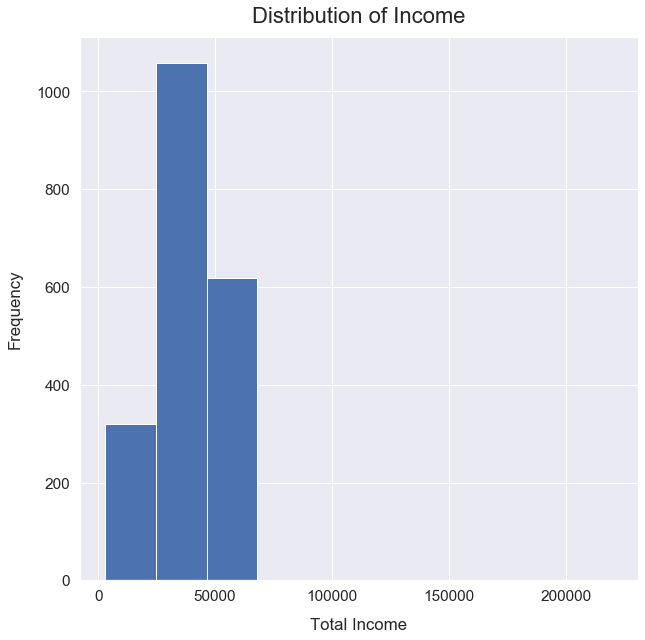

In [13]:
sns.set(font_scale=1.4)
df['Income'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Total Income", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Income", y=1.015, fontsize=22);

In [6]:
df['Outcome'].value_counts()

Paid         1118
Defaulted     882
Name: Outcome, dtype: int64

In [7]:
df['Country'].unique()

array(['UK', 'France', 'Germany', 'Spain'], dtype=object)

In [8]:
df=df.drop('Customer ID',axis=1)

In [9]:
df.shape

(2000, 13)

In [10]:
df=df.drop('Postcode',axis=1)

In [11]:
df.shape

(2000, 12)

In [12]:
df.head()

,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,Miah,19,F,2,Unemployed,UK,0,45500,Rent,1,13234,Paid
1,Hollis,66,F,13,Unemployed,UK,1080,18000,Own,0,5561,Paid
2,Barker,48,F,4,Self Employed,UK,3690,47500,Rent,1,28288,Paid
3,Titford,67,F,47,Self Employed,UK,6560,36000,Mortgage,0,30199,Paid
4,Berry,70,M,8,Self Employed,UK,9100,50500,Own,0,35078,Paid


In [13]:
df["Gender"][df["Gender"]=="M"]=1
df["Gender"][df["Gender"]=="F"]=2
df["Gender"][df["Gender"]=="Female"]=2
df["Gender"][df["Gender"]=="Male"]=1
df["Gender"][df["Gender"]=="H"]=1
df["Gender"][df["Gender"]=="D"]=2
df["Gender"][df["Gender"]=="N"]=1

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can 

In [14]:
df.head()

,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,Miah,19,2,2,Unemployed,UK,0,45500,Rent,1,13234,Paid
1,Hollis,66,2,13,Unemployed,UK,1080,18000,Own,0,5561,Paid
2,Barker,48,2,4,Self Employed,UK,3690,47500,Rent,1,28288,Paid
3,Titford,67,2,47,Self Employed,UK,6560,36000,Mortgage,0,30199,Paid
4,Berry,70,1,8,Self Employed,UK,9100,50500,Own,0,35078,Paid


In [15]:
df["Country"][df["Country"]=="UK"]=1
df["Country"][df["Country"]=="France"]=2
df["Country"][df["Country"]=="Germany"]=3
df["Country"][df["Country"]=="Spain"]=4

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can 

In [16]:
df.head()

,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,Miah,19,2,2,Unemployed,1,0,45500,Rent,1,13234,Paid
1,Hollis,66,2,13,Unemployed,1,1080,18000,Own,0,5561,Paid
2,Barker,48,2,4,Self Employed,1,3690,47500,Rent,1,28288,Paid
3,Titford,67,2,47,Self Employed,1,6560,36000,Mortgage,0,30199,Paid
4,Berry,70,1,8,Self Employed,1,9100,50500,Own,0,35078,Paid


In [17]:
df['Employment status'].unique()

array(['Unemployed', 'Self Employed', 'Employed', 'Retired'], dtype=object)

In [18]:
df["Employment status"][df["Employment status"]=="Unemployed"]=1
df["Employment status"][df["Employment status"]=="Self Employed"]=2
df["Employment status"][df["Employment status"]=="Employed"]=3
df["Employment status"][df["Employment status"]=="Retired"]=4

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can 

In [19]:
df.head()

,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,Miah,19,2,2,1,1,0,45500,Rent,1,13234,Paid
1,Hollis,66,2,13,1,1,1080,18000,Own,0,5561,Paid
2,Barker,48,2,4,2,1,3690,47500,Rent,1,28288,Paid
3,Titford,67,2,47,2,1,6560,36000,Mortgage,0,30199,Paid
4,Berry,70,1,8,2,1,9100,50500,Own,0,35078,Paid


In [20]:
df['Own home'].unique()

array(['Rent', 'Own', 'Mortgage'], dtype=object)

In [21]:
df["Own home"][df["Own home"]=="Rent"]=1
df["Own home"][df["Own home"]=="Own"]=2
df["Own home"][df["Own home"]=="Mortgage"]=3

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can 

In [22]:
df.head()

,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,Miah,19,2,2,1,1,0,45500,1,1,13234,Paid
1,Hollis,66,2,13,1,1,1080,18000,2,0,5561,Paid
2,Barker,48,2,4,2,1,3690,47500,1,1,28288,Paid
3,Titford,67,2,47,2,1,6560,36000,3,0,30199,Paid
4,Berry,70,1,8,2,1,9100,50500,2,0,35078,Paid


In [23]:
df['Outcome'].unique()

array(['Paid', 'Defaulted'], dtype=object)

In [24]:
df["Outcome"][df["Outcome"]=="Paid"]=1
df["Outcome"][df["Outcome"]=="Defaulted"]=2

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df.head()

,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,Miah,19,2,2,1,1,0,45500,1,1,13234,1
1,Hollis,66,2,13,1,1,1080,18000,2,0,5561,1
2,Barker,48,2,4,2,1,3690,47500,1,1,28288,1
3,Titford,67,2,47,2,1,6560,36000,3,0,30199,1
4,Berry,70,1,8,2,1,9100,50500,2,0,35078,1


In [26]:
df.shape

(2000, 12)

In [29]:
le = preprocessing.LabelEncoder()

In [30]:
yencoded=le.fit_transform(df['Fictional Surname'])

In [31]:
yencoded

array([912, 633,  82, ..., 130, 541, 701])

In [32]:
yencoded.max()

1461

In [33]:
yencoded.min()

0

In [34]:
df['Fictional Name']=yencoded

In [35]:
df.head()

,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome,Fictional Name
0,Miah,19,2,2,1,1,0,45500,1,1,13234,1,912
1,Hollis,66,2,13,1,1,1080,18000,2,0,5561,1,633
2,Barker,48,2,4,2,1,3690,47500,1,1,28288,1,82
3,Titford,67,2,47,2,1,6560,36000,3,0,30199,1,1311
4,Berry,70,1,8,2,1,9100,50500,2,0,35078,1,111


In [36]:
df=df.drop('Fictional Surname',axis=1)

In [37]:
df.head()

,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome,Fictional Name
0,19,2,2,1,1,0,45500,1,1,13234,1,912
1,66,2,13,1,1,1080,18000,2,0,5561,1,633
2,48,2,4,2,1,3690,47500,1,1,28288,1,82
3,67,2,47,2,1,6560,36000,3,0,30199,1,1311
4,70,1,8,2,1,9100,50500,2,0,35078,1,111


In [38]:
Features=df.drop('Outcome',axis=1)

In [39]:
Features

,Age,Gender,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Fictional Name
0,19,2,2,1,1,0,45500,1,1,13234,912
1,66,2,13,1,1,1080,18000,2,0,5561,633
2,48,2,4,2,1,3690,47500,1,1,28288,82
3,67,2,47,2,1,6560,36000,3,0,30199,1311
4,70,1,8,2,1,9100,50500,2,0,35078,111
...,...,...,...,...,...,...,...,...,...,...,...
1995,60,2,4,2,1,2900,22500,2,1,15725,653
1996,24,2,7,2,1,5130,38000,2,0,35911,1107
1997,34,1,5,1,1,6530,41500,2,2,6874,130
1998,52,2,2,3,1,930,32500,2,0,5412,541


In [41]:
Label=df['Outcome']

In [50]:
Label=Label.astype('int')

In [51]:
Label

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    2
Name: Outcome, Length: 2000, dtype: int32

In [52]:
Label.unique()

array([1, 2], dtype=int64)

In [53]:
Features['Gender'].unique()

array([2, 1, '1', '0'], dtype=object)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.20, random_state=424)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
clf=LogisticRegression()

In [57]:
clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predicted= clf.predict(X_test)
print("PREDICCITED RESULTS::")
for i in predicted:
    if i==1:
        print("Paid")
    else:
        print("Defaulted")

PREDICCITED RESULTS::
Defaulted
Defaulted
Paid
Paid
Defaulted
Defaulted
Defaulted
Defaulted
Defaulted
Defaulted
Paid
Paid
Paid
Paid
Defaulted
Paid
Paid
Paid
Defaulted
Paid
Paid
Paid
Defaulted
Paid
Paid
Defaulted
Defaulted
Defaulted
Paid
Paid
Paid
Paid
Paid
Defaulted
Defaulted
Paid
Paid
Defaulted
Defaulted
Paid
Paid
Defaulted
Defaulted
Paid
Defaulted
Defaulted
Defaulted
Defaulted
Defaulted
Paid
Paid
Paid
Paid
Paid
Paid
Paid
Defaulted
Paid
Paid
Defaulted
Paid
Defaulted
Paid
Paid
Paid
Paid
Defaulted
Paid
Paid
Paid
Paid
Defaulted
Defaulted
Paid
Paid
Defaulted
Paid
Paid
Paid
Defaulted
Defaulted
Paid
Paid
Defaulted
Defaulted
Paid
Paid
Paid
Defaulted
Paid
Paid
Paid
Paid
Defaulted
Defaulted
Paid
Defaulted
Defaulted
Defaulted
Paid
Paid
Paid
Defaulted
Paid
Defaulted
Paid
Paid
Paid
Paid
Defaulted
Defaulted
Defaulted
Paid
Paid
Paid
Paid
Defaulted
Defaulted
Paid
Defaulted
Paid
Paid
Defaulted
Paid
Defaulted
Paid
Paid
Defaulted
Defaulted
Paid
Defaulted
Paid
Paid
Defaulted
Paid
Defaulted
Paid
Paid
Pai

In [59]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[173  46]
 [ 73 108]]


Text(0.5, 257.44, 'Predicted label')

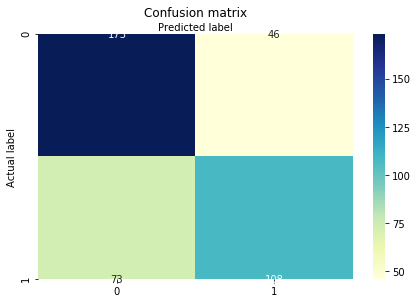

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

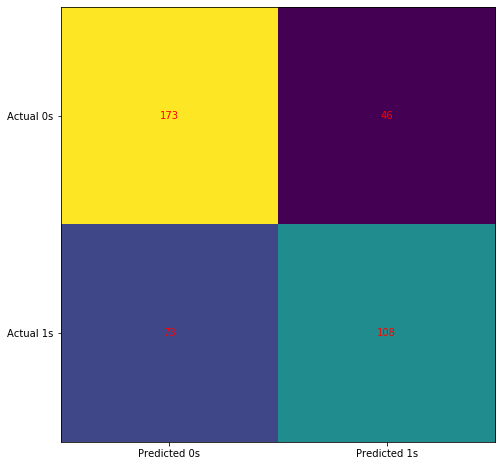

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [62]:
sa=accuracy_score(y_test, predicted)*100
sa

70.25

In [63]:
from sklearn import tree

In [64]:
tr = tree.DecisionTreeClassifier()

In [65]:
tr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
result=tr.predict(X_test)

In [67]:
cm = metrics.confusion_matrix(y_test, result)
print(cm)

[[161  58]
 [ 62 119]]


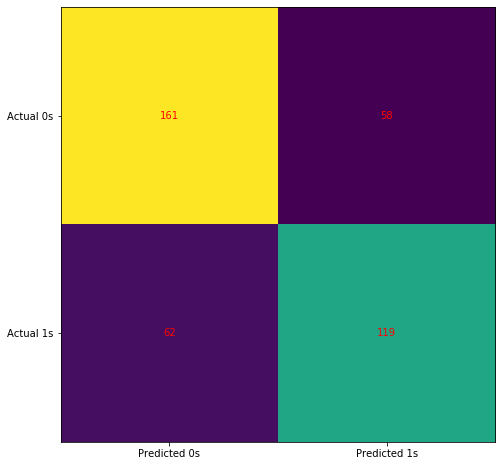

In [68]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [69]:
accuracy_score(y_test, result)*100

70.0

In [70]:
X_train=np.asarray(X_train).astype(np.int)
X_test=np.asarray(X_test).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

In [71]:
import tensorflow as tf

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model=Sequential()
model.add(Dense(16, input_dim=11,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
history=model.fit(X_train,y_train,epochs=10,batch_size=10)

Train on 1600 samples
Epoch 1/10
1600/1600 [==============================] - 1s 728us/sample - loss: -114753.7740 - accuracy: 0.5200
Epoch 2/10
1600/1600 [==============================] - 0s 184us/sample - loss: -473010993.6910 - accuracy: 0.5619
Epoch 3/10
1600/1600 [==============================] - 0s 178us/sample - loss: -67447327488.0000 - accuracy: 0.5619
Epoch 4/10
1600/1600 [==============================] - 0s 179us/sample - loss: -1933546789990.3999 - accuracy: 0.5619
Epoch 5/10
1600/1600 [==============================] - 0s 184us/sample - loss: -22492264766668.8008 - accuracy: 0.5619
Epoch 6/10
1600/1600 [==============================] - 0s 179us/sample - loss: -155353405731635.1875 - accuracy: 0.5619
Epoch 7/10
1600/1600 [==============================] - 0s 204us/sample - loss: -701221969159782.3750 - accuracy: 0.5619
Epoch 8/10
1600/1600 [==============================] - 0s 200us/sample - loss: -2500445127416217.5000 - accuracy: 0.5619
Epoch 9/10
1600/1600 [=========

In [79]:
y_pred=model.predict(X_test)

In [80]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[219   0]
 [181   0]]


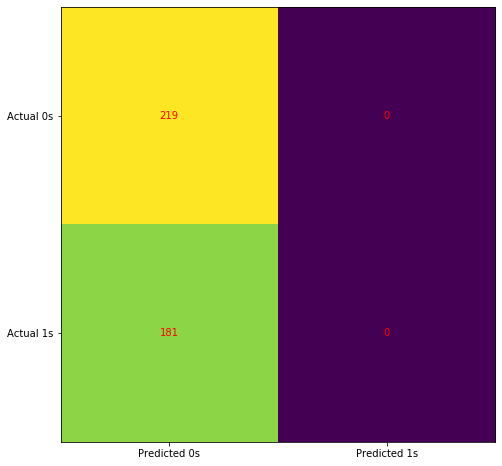

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [82]:
a= accuracy_score(y_pred,y_test)
print(a*100)

54.75
